In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [4]:
mat1 = material(1.0^2,1.0)
mat2 = material(epstable("silver"),1.0)

λ = 500:15:900
k₀ = 2π./λ;

In [5]:
matScatter = [mat1; mat2];

In [6]:
w,d = 413.,10.
rc = 2.
Nc,Nw,Nd = 3,10,5
xC = (0,0);

In [7]:
rod = Rod(w,d,rc,Nc,Nw,Nd);

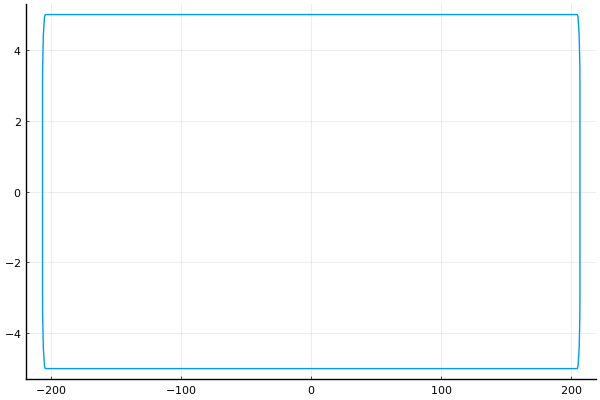

In [8]:
X,Y = getSurfPoints(rod)
plot(X,Y,legend=:none)

In [9]:
u =1
dThr = 100.
m = 2

2

In [10]:
str = rod
rp,sArr = getSvec(m,rod);

In [11]:
i = 1
r = 500.
α = 30.

30.0

In [12]:
@time σₐArr = getσₐ(m,k₀,matScatter,str,dThr,α);

185.848244 seconds (1.78 G allocations: 69.795 GiB, 13.71% gc time, 8.84% compilation time)


In [16]:
@time σₑArr = getσₑ(m,k₀,matScatter,str,dThr,r,α);

134.539322 seconds (1.77 G allocations: 69.032 GiB, 14.22% gc time, 0.72% compilation time)


In [17]:
@time σₛArr = getσₛ(m,k₀,matScatter,str,dThr,r,α);

211.008680 seconds (2.99 G allocations: 105.735 GiB, 14.21% gc time, 0.13% compilation time)


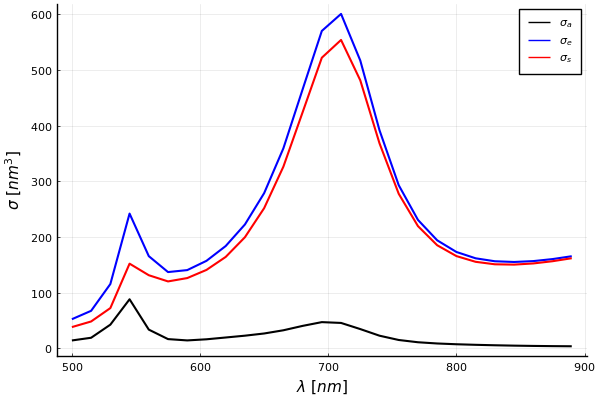

In [18]:
plot(2π./k₀,σₐArr,c=:black,lw=1.5,label=L"σ_a")
plot!(2π./k₀,σₑArr,c=:blue,lw=1.5,label=L"σ_e")
plot!(2π./k₀,σₛArr,c=:red,lw=1.5,label=L"σ_s",xlabel=L"\lambda~[nm]",ylabel=L"\sigma~[nm^3]")